<a href="https://colab.research.google.com/github/TateKessler/DS2002F24/blob/main/KESSLER_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Null Hypothesis:The conversion rates for Version A and Version B are equal.

In [1]:
import numpy as np
import scipy.stats as stats

visitors_A = 5000
conversions_A = 150
visitors_B = 5000
conversions_B = 180

p_A = conversions_A / visitors_A
p_B = conversions_B / visitors_B

p_pooled = (conversions_A + conversions_B) / (visitors_A + visitors_B)

se = np.sqrt(p_pooled * (1 - p_pooled) * (1 / visitors_A + 1 / visitors_B))

z_stat = (p_B - p_A) / se

p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_stat)))

p_value_one_tailed = 1 - stats.norm.cdf(z_stat)

alpha = 0.05
two_tailed_result = "Reject H0" if p_value_two_tailed < alpha else "Fail to reject H0"
one_tailed_result = "Reject H0" if p_value_one_tailed < alpha else "Fail to reject H0"

print(f"Z-statistic: {z_stat:.4f}")
print(f"Two-tailed p-value: {p_value_two_tailed:.4f}")
print(f"Two-tailed test result: {two_tailed_result}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")
print(f"One-tailed test result: {one_tailed_result}")

Z-statistic: 1.6794
Two-tailed p-value: 0.0931
Two-tailed test result: Fail to reject H0
One-tailed p-value: 0.0465
One-tailed test result: Reject H0


Probability that Version B is better than Version A: 0.9542


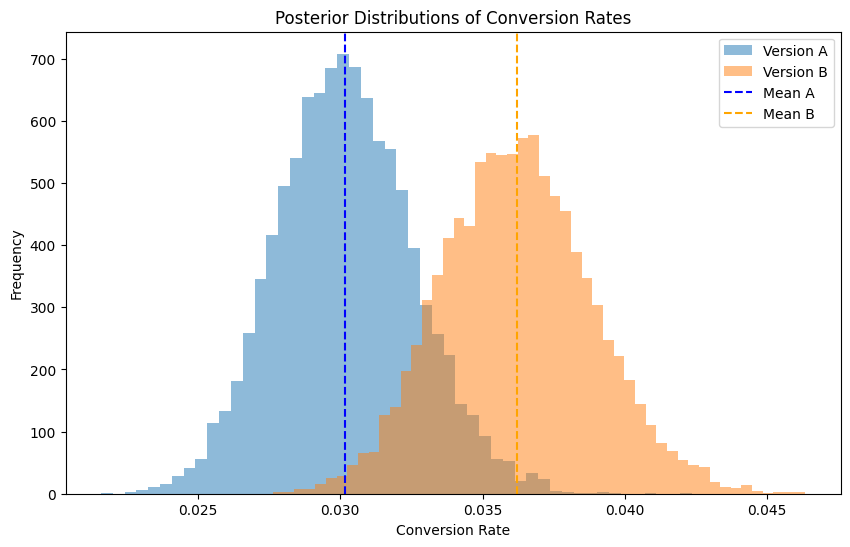

In [3]:
import matplotlib.pyplot as plt
import scipy.special as sp

np.random.seed(42)

a_prior, b_prior = 1, 1

posterior_A = np.random.beta(conversions_A + a_prior, visitors_A - conversions_A + b_prior, 10000)
posterior_B = np.random.beta(conversions_B + a_prior, visitors_B - conversions_B + b_prior, 10000)

prob_B_superior = np.mean(posterior_B > posterior_A)
print(f"Probability that Version B is better than Version A: {prob_B_superior:.4f}")

plt.figure(figsize=(10, 6))
plt.hist(posterior_A, bins=50, alpha=0.5, label="Version A")
plt.hist(posterior_B, bins=50, alpha=0.5, label="Version B")
plt.axvline(x=np.mean(posterior_A), color='blue', linestyle='dashed', label="Mean A")
plt.axvline(x=np.mean(posterior_B), color='orange', linestyle='dashed', label="Mean B")
plt.legend()
plt.title("Posterior Distributions of Conversion Rates")
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.show()


{'Accuracy': 0.9, 'Precision': 0.8851674641148325, 'Recall': 0.9203980099502488, 'F1 Score': 0.9024390243902439, 'Mean CV Accuracy': 0.8900000000000001}


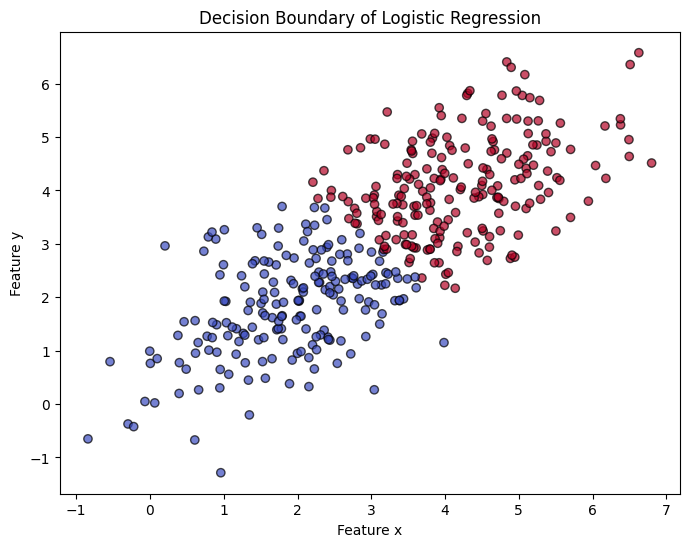

In [8]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

file_path = "HW3.jsonl"

with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

df = pd.DataFrame(data)

X = df[['x', 'y']]
y = df['l']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cv_scores = cross_val_score(model, X, y, cv=100)

results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Mean CV Accuracy": np.mean(cv_scores)
}
print(results)

plt.figure(figsize=(8, 6))
plt.scatter(X_test['x'], X_test['y'], c=y_pred, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title("Decision Boundary of Logistic Regression")
plt.xlabel("Feature x")
plt.ylabel("Feature y")
plt.show()
